<a href="https://colab.research.google.com/github/hagerkhaled26/Dog-breeds-recognition-/blob/master/Copy_of_dog_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.7MB/s 
     |████████████████████████████████| 194kB 29.6MB/s 
     |████████████████████████████████| 1.1MB 17.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 40kB 7.8MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 2.6MB 59.1MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '261fe5a85d0b4212a203acaa0f780dee')

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
dogs_types='Golden Retriever','German Shepherd','Bulldog'
path=Path('dogs')

In [ ]:
if not path.exists():
  path.mkdir()
for i in dogs_types:
  dest=(path/i)
  dest.mkdir(exist_ok=True)
  finals=search_images_bing(key,f'{i} dog')
  download_images(dest, urls=finals.attrgot('content_url'))

In [ ]:
fn = get_image_files(path)
fn

(#450) [Path('dogs/Golden Retriever/00000046.jpg'),Path('dogs/Golden Retriever/00000094.jpg'),Path('dogs/Golden Retriever/00000009.jpg'),Path('dogs/Golden Retriever/00000036.jpg'),Path('dogs/Golden Retriever/00000053.jpg'),Path('dogs/Golden Retriever/00000085.jpg'),Path('dogs/Golden Retriever/00000088.jpg'),Path('dogs/Golden Retriever/00000038.jpg'),Path('dogs/Golden Retriever/00000027.jpg'),Path('dogs/Golden Retriever/00000059.jpg')...]

In [ ]:
fail=verify_images(fn)
fail
fail.map(Path.unlink);
#fail=verify_images(fn)


In [ ]:
fail

(#3) [Path('dogs/Golden Retriever/00000064.jpg'),Path('dogs/Golden Retriever/00000102.jpg'),Path('dogs/Bulldog/00000076.jpg')]

In [ ]:
dogss=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=0.2,seed=42),
               get_y=parent_label,
               item_tfms=Resize(128))

In [ ]:
dls=dogss.dataloaders(path)

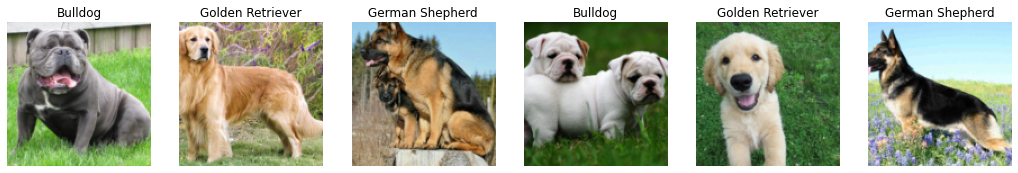

In [ ]:
dls.valid.show_batch(max_n=6,nrows=1)

In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.480872,0.126286,0.044944,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.369866,0.018967,0.000000,00:13
1,0.280563,0.029649,0.000000,00:13
2,0.204269,0.021575,0.011236,00:13
3,0.149665,0.026658,0.011236,00:13


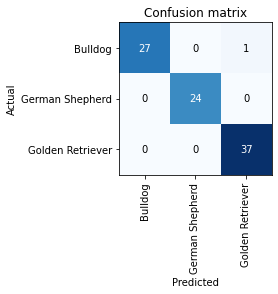

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['Bulldog', 'German Shepherd', 'Golden Retriever']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
learn_inf.predict('test.jpg')

('Golden Retriever', tensor(2), tensor([0.0018, 0.0012, 0.9970]))